In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [125]:
workbook = pd.read_csv('COVID-19-DATABASE.xlsx-CONFIRMED.csv')
workbook.head()

,MM (Morbidity Month),MW (Morbidity Week),DATE REPORTED,DRU,REGION OF DRU,MUNCITY OF DRU,LAST NAME,FIRST NAME,MIDDLE NAME,DOB,...,ADDRESS(LSI),OFW(Y/N),PLACE OF ORIGIN (OFW),DATE OF ARRIVAL (OFW),AUTHORIZED PERSON OUTSIDE RESIDENCE (Y/N),LOCAL/IMPORTED CASE,RETURNING OVERSEAS FILIPIN (Y/N),REMARKS,DUPLICATE CHECKER,DATE (SORTED)
0,NaN,NaN,2020-01-08,NaN,4A,GENERAL TRIAS,Patient 188,Patient 188,unknown,09/12/1986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 188, Patient 188 unknown",2020-01-08
1,NaN,NaN,2020-01-08,NaN,4A,GENERAL TRIAS,Patient 220,Patient 220,Unknown,02/07/1989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 220, Patient 220 Unknown",2020-01-08
2,NaN,NaN,2020-01-09,NaN,4A,GENERAL TRIAS,Patient 1097,Patient 1097,unknown,07/02/1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 1097, Patient 1097 unknown",2020-01-09
3,NaN,NaN,2020-01-09,NaN,4A,GENERAL TRIAS,Patient 1099,Patient 1099,Unknown,03/22/1991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 1099, Patient 1099 Unknown",2020-01-09
4,NaN,NaN,2020-01-09,CHO GENERAL TRIAS,4A,GENERAL TRIAS,Patient 1100,Patient 1100,unknown,01/05/1969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 1100, Patient 1100 unknown",2020-01-09


In [126]:
boink = workbook['DATE REPORTED']
boink.head()

0    2020-01-08
1    2020-01-08
2    2020-01-09
3    2020-01-09
4    2020-01-09
Name: DATE REPORTED, dtype: object

In [127]:
freq = {}
for item in boink:
    if len(str(item)) == 10: #filter to check for anomalies in format
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1

In [128]:
xpoints = [] #Date
ypoints = [] #Frequency
for key, value in freq.items():
        print (key, ":", value)
        xpoints.append(key)
        ypoints.append(int(value))

2020-01-08 : 2
2020-01-09 : 6
2020-01-10 : 1
2020-01-11 : 9
2020-01-12 : 1
2020-02-08 : 1
2020-02-09 : 6
2020-02-10 : 18
2020-02-11 : 1
2020-02-12 : 1
2020-03-01 : 1
2020-03-07 : 2
2020-03-08 : 1
2020-03-09 : 9
2020-03-10 : 2
2020-03-12 : 3
2020-03-20 : 1
2020-03-25 : 1
2020-03-26 : 1
2020-03-28 : 2
2020-03-29 : 1
2020-04-01 : 1
2020-04-02 : 1
2020-04-05 : 3
2020-04-08 : 1
2020-04-09 : 14
2020-04-10 : 7
2020-04-12 : 1
2020-04-13 : 1
2020-04-14 : 1
2020-04-16 : 2
2020-04-21 : 1
2020-04-25 : 2
2020-04-30 : 1
2020-05-08 : 5
2020-05-09 : 34
2020-05-10 : 5
2020-05-11 : 3
2020-05-12 : 4
2020-05-14 : 1
2020-05-16 : 2
2020-05-18 : 2
2020-05-19 : 1
2020-05-23 : 2
2020-05-25 : 1
2020-05-29 : 1
2020-05-31 : 1
2020-06-03 : 2
2020-06-04 : 2
2020-06-08 : 8
2020-06-09 : 10
2020-06-10 : 1
2020-06-12 : 2
2020-06-13 : 2
2020-06-18 : 1
2020-06-19 : 1
2020-06-20 : 5
2020-06-22 : 8
2020-06-23 : 2
2020-06-24 : 6
2020-06-25 : 3
2020-06-26 : 1
2020-06-27 : 3
2020-06-28 : 1
2020-06-29 : 3
2020-06-30 : 2
2020-0

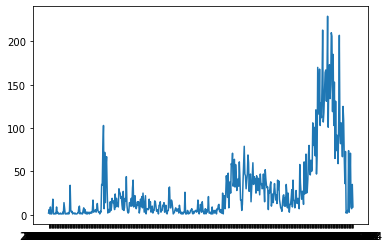

In [129]:
# Matplotlib Implementation
plt.plot(xpoints, ypoints)
plt.show()

In [130]:
# Pandas
#data = pd.DataFrame(data, columns=["Date", "Frequency"])
data = pd.DataFrame( {'Date': xpoints, 'Frequency': ypoints} )
data

,Date,Frequency
0,2020-01-08,2
1,2020-01-09,6
2,2020-01-10,1
3,2020-01-11,9
4,2020-01-12,1
...,...,...
489,2021-11-04,71
490,2021-12-01,9
491,2021-12-02,7
492,2021-12-03,35


<AxesSubplot:xlabel='Date'>

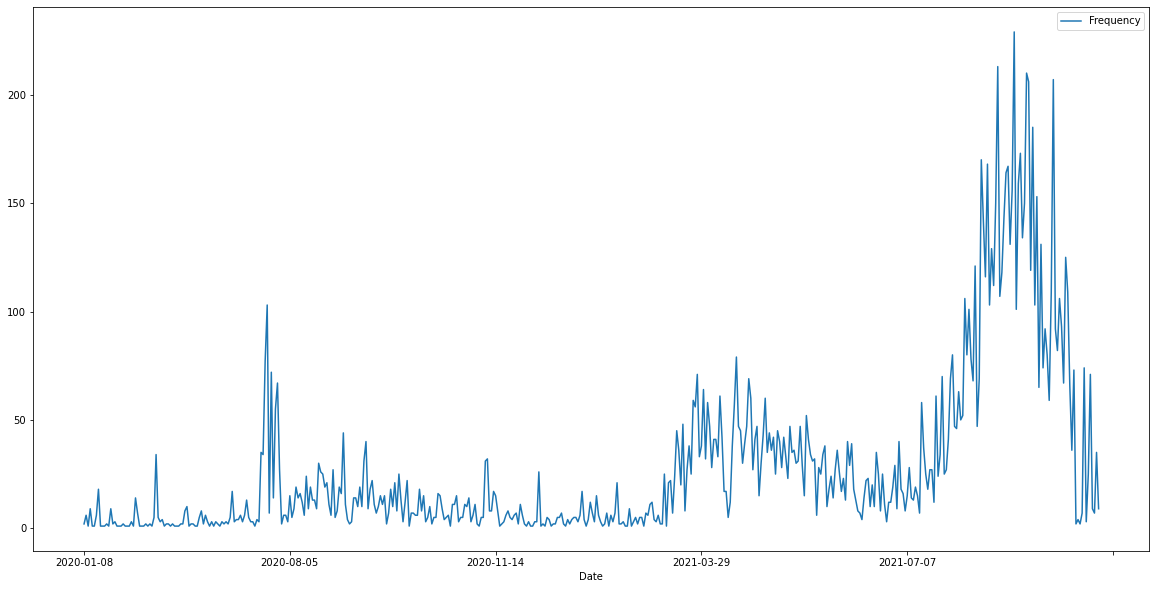

In [131]:
data.plot(kind="line", x="Date", y="Frequency", figsize=(20, 10))

In [132]:
from dateutil import rrule
from datetime import timedelta
import datetime as dt

start = dt.date(2020, 3, 20)
end = dt.date(2021, 12, 4)

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

date_counter = 0
day_counter = 0
week = 0
freq_count = 0

x = []
y = []

for days in daterange(start, end):
    for date in xpoints:
        if date == str(days):
            freq_count = freq_count + ypoints[date_counter]
            date_counter = date_counter + 1
        else:
            continue
        

    day_counter = day_counter + 1
    if day_counter % 7 == 0:
        week = week + 1
        x.append(week)
        y.append(freq_count)
        freq_count = 0


data = pd.DataFrame( {'Week': x, 'Frequency': y} )
data

,Week,Frequency
0,1,9
1,2,17
2,3,20
3,4,15
4,5,3
...,...,...
84,85,381
85,86,0
86,87,0
87,88,0


<AxesSubplot:xlabel='Week'>

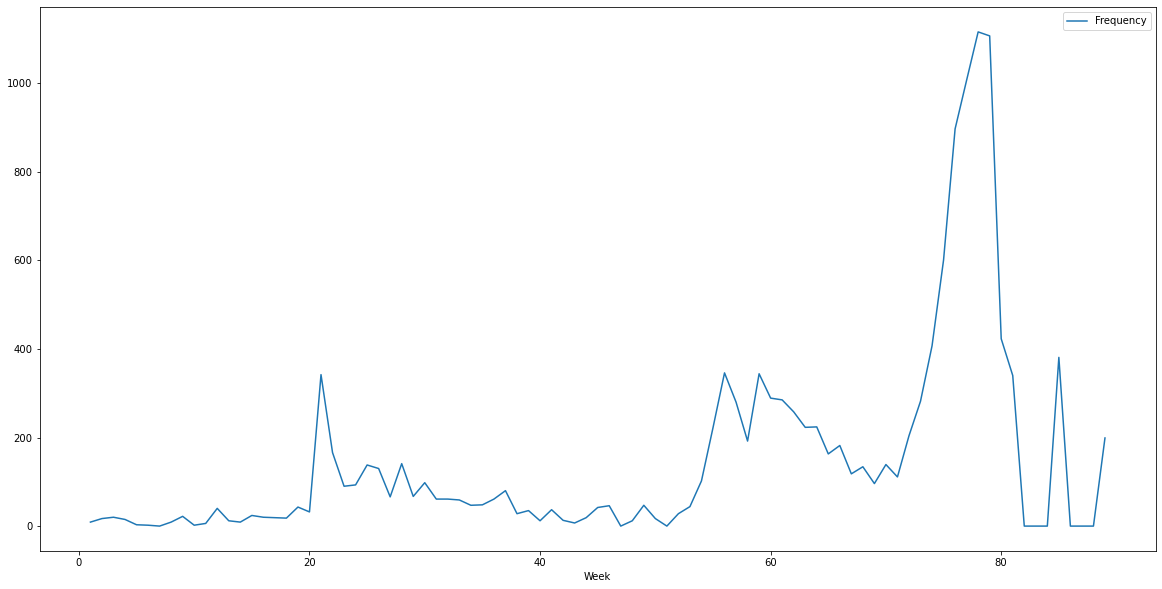

In [133]:
data.plot(kind="line", x="Week", y="Frequency", figsize=(20, 10), linestyle="-")